## Previsão de preços BTC

In [1]:
# Importação de bibliotecas 

#Básicas
import pandas as pd
import numpy as np
import seaborn as sns
from datetime import datetime as dt

# Modelos estatísticos 
from statsmodels.tsa.stattools import adfuller, acf, pacf
from statsmodels.tsa.arima.model import ARIMA

#Incremento de data em intervalo definido
from pandas.tseries.offsets import DateOffset

#Plots gráficos
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import plotly.express as px

#Avisos
import warnings
warnings.filterwarnings('ignore') #Desativando 'impressão' de avisos


In [2]:
#Importação do DataSet
dados = pd.read_csv("Data\Bitcoin.csv")

- Visualização Inicial dos Dados

In [3]:
dados.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100


In [4]:
dados.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Open,2683.0,1.098990e+04,1.590262e+04,1.768970e+02,6.017780e+02,6.235030e+03,1.031664e+04,6.754973e+04
High,2683.0,1.128663e+04,1.633195e+04,2.117310e+02,6.067070e+02,6.371550e+03,1.049561e+04,6.878962e+04
Low,2683.0,1.066296e+04,1.540807e+04,1.715100e+02,5.960480e+02,6.093670e+03,1.006754e+04,6.638206e+04
Close,2683.0,1.100358e+04,1.590816e+04,1.781030e+02,6.027335e+02,6.238050e+03,1.031794e+04,6.756683e+04
Adj Close,2683.0,1.100358e+04,1.590816e+04,1.781030e+02,6.027335e+02,6.238050e+03,1.031794e+04,6.756683e+04
Volume,2683.0,1.459304e+10,2.008458e+10,5.914570e+06,7.839140e+07,4.999240e+09,2.445092e+10,3.509679e+11


- Limpeza dos Dados

In [5]:
# Inserindo no novo Dataframe apenas colunas selecionadas
df = dados.iloc[:,[0,-2]]
#Renomeando colunas
df.columns = ['Date', 'Price']
#Convertendo coluna date para tipo time
df.loc[:, 'Date'] = pd.to_datetime(df['Date'])
#definindo coluna 'Date' como index
df.set_index('Date', inplace=True)
#Criando cópia do DF por segurança ***(Quando deep=True, as alterações na cópia não serão refletidas no original)
df_seg = df.copy(deep=True)

display(df.head(10))

print('\n\033[1mInfo: \033[0m Dataset contém {} amostras'.format(df.shape[0]))


,Price
Date,
2014-09-17,457.334015
2014-09-18,424.440002
2014-09-19,394.795990
2014-09-20,408.903992
2014-09-21,398.821014
2014-09-22,402.152008
2014-09-23,435.790985
2014-09-24,423.204987
2014-09-25,411.574005



Info:  Dataset contém 2683 amostras


In [7]:
#Plotagem gráfica com Plotly
fig = px.area(df, title ="Variação de preço 2015 até 2022", labels=dict( Date="Data", value="Preço ($)", variable="Legenda"))
fig.show()

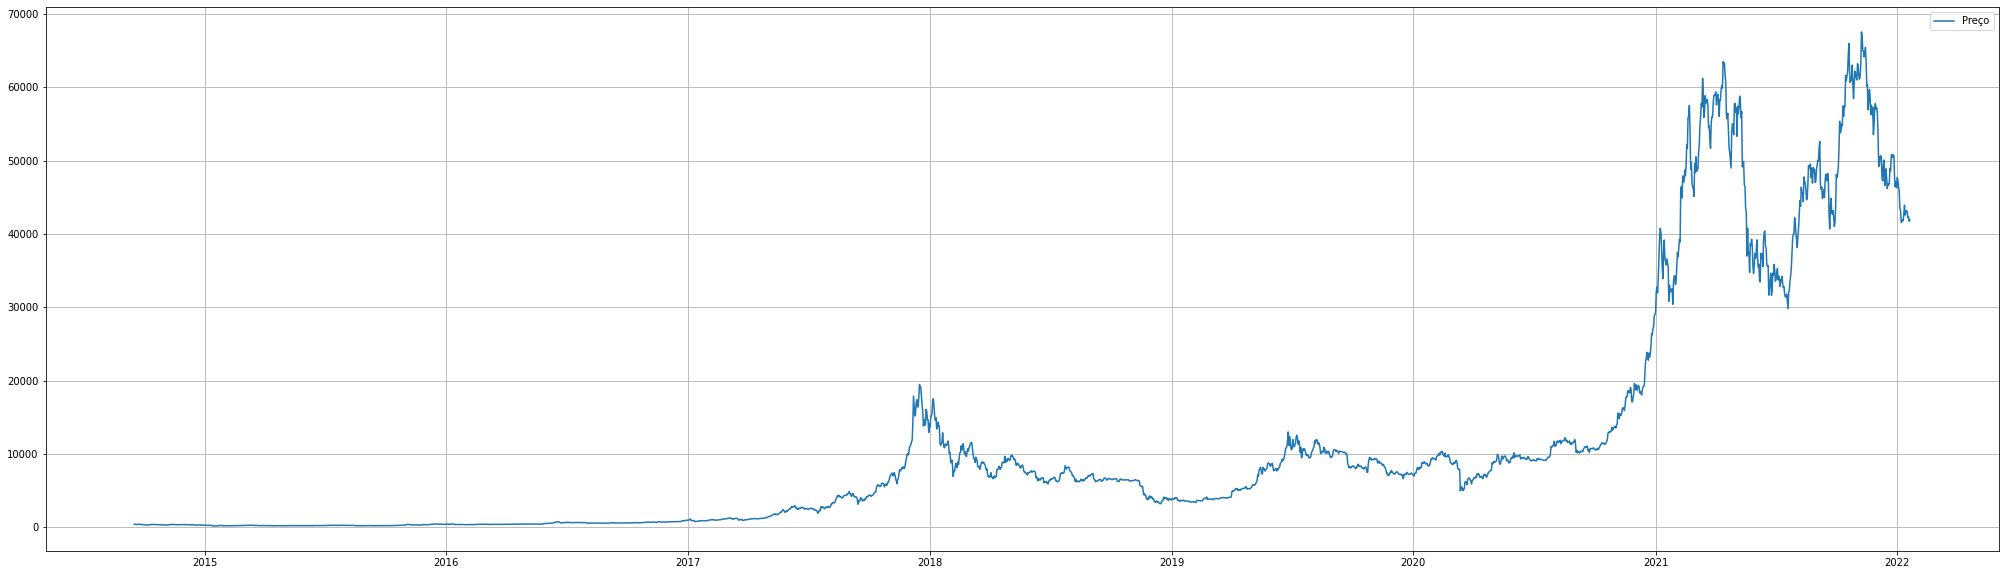


Análise:  Nota-se uma clara tendência de alta no preço da criptomoeda com alguma sazonalidade (** Sazonalidade = Variações que ocorrem em intervalos regulares).


In [33]:
#Plotagem gráfica com Matplotlib 
plt.figure(figsize=(35,10))
plt.plot(df, label="Preço")
plt.grid()
plt.legend()
plt.show()

print('\n\033[1mAnálise: \033[0m Nota-se uma clara tendência de alta no preço da criptomoeda com alguma sazonalidade (** Sazonalidade = Variações que ocorrem em intervalos regulares).')

### Verificação de Estacionariedade
- Validação visual por meio de gráfico

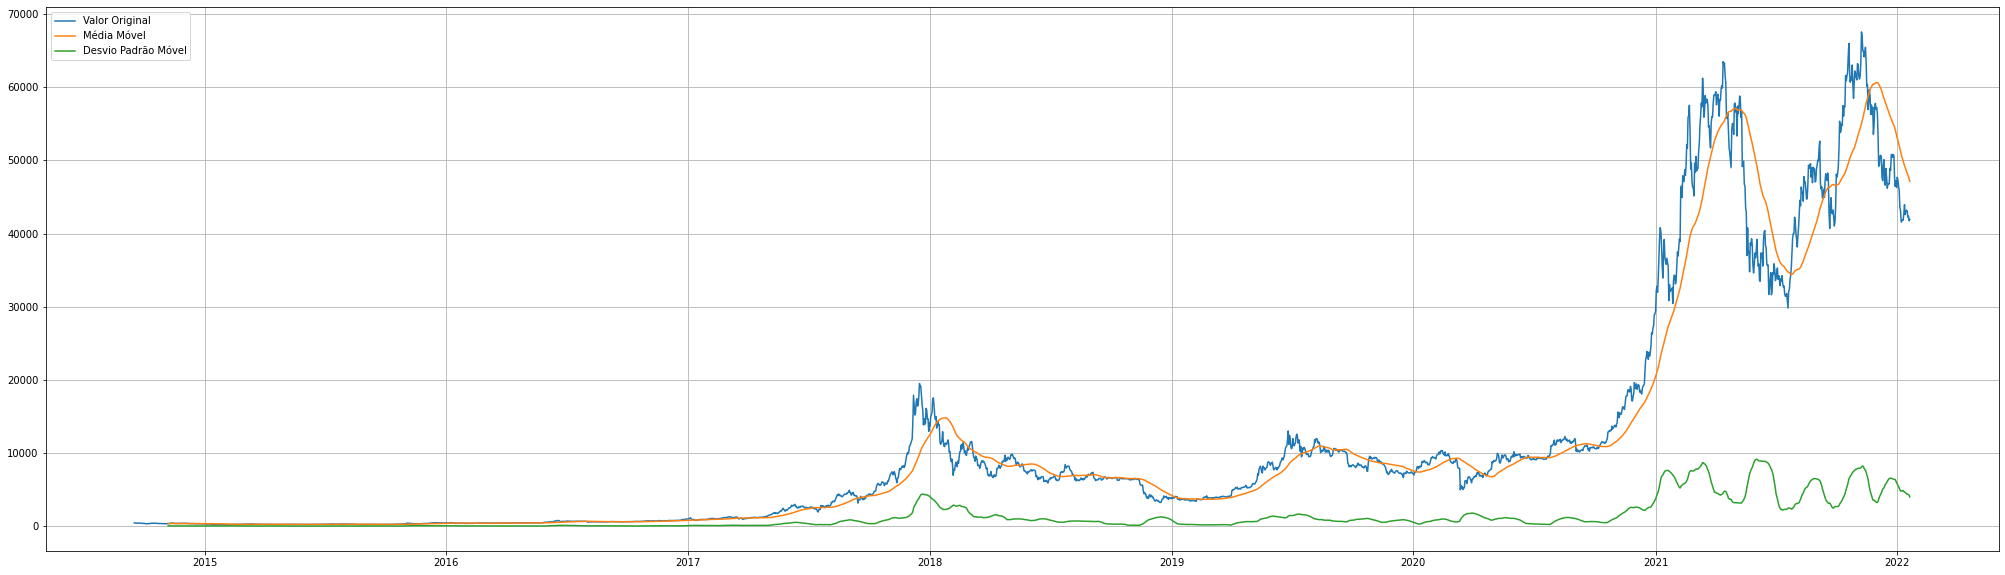

In [31]:
plt.figure(figsize=(35,10))

plt.plot(df, label='Valor Original')
# Cálculo de média e desvio padrão "Móveis"
plt.plot(df.rolling(window=52).mean(), label="Média Móvel" )
plt.plot(df.rolling(window=52).std(), label="Desvio Padrão Móvel")

plt.grid()
plt.legend()
plt.show()    

- Validação Estatística
    -  Utilizando o teste Dickey-Fuller, que consiste em : Validar se o modelo possui raiz unitária (Se obtiver-mos |L| < 1, Indica que a série é explosiva. Ou seja, não estacionária) podemos identificar a aleatoriedade dos dados.
        - Para que a série seja estacionária, o parâmetro Φ esteja entre -1 e 1.
    - Valor de P:
        - É a probabilidade de se obter uma estatística de teste igual ou mais extrema que aquela observada em uma amostra, sob a hipótese nula    
    - Lag      
        - Calcula a autocorrelação lag-N.
    - Valor Crítico
        - Teste de hipótese onde os valores críticos, são pontos sobre a distribuição da estatística de teste.    

In [46]:
adf = adfuller(df)
padf = pd.Series(adf[:4], index=['Estatística T:', 'Valor de P:', '#Lag:', 'Observações usadas:'])
for k,v in adf[4].items():
    padf['Valor Crítico {}:'.format(k)] = v

print(padf)

Estatística T:           -1.138159
Valor de P:               0.699617
#Lag:                    28.000000
Observações usadas:    2654.000000
Valor Crítico 1%:        -3.432816
Valor Crítico 5%:        -2.862630
Valor Crítico 10%:       -2.567350
dtype: float64


##### -------------------------------------- 
##### Análise dos dados obtidos:
- Como:
    - A estatística T, é maior que o valor crítico;
    - A média móvel não é constante ao longo do tempo;
- Então: 
    - Isso implica diretamente que a série temporal NÃO é estacionária.
##
- Vamos corrigir isso decompondo usando Média Móvel       
##### -------------------------------------- 